## Importing libraries

In [25]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist #the dataset
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense #the layers
import numpy as np 
import matplotlib.pyplot as plt

## Downloading Data

In [26]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() #loading data

## Exploring Data

In [27]:
train_images.shape # we have 60,000 images with 28x28px

(60000, 28, 28)

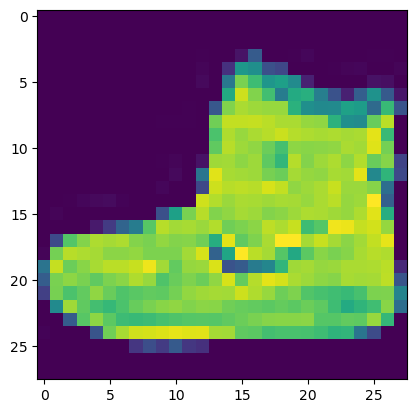

In [28]:
plt.imshow(train_images[0])

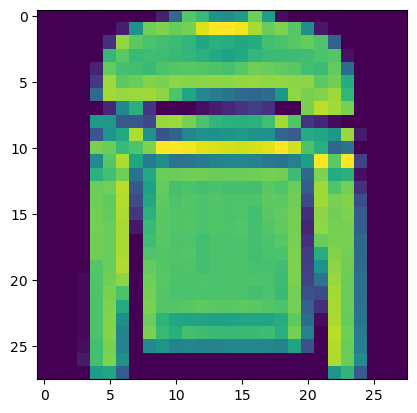

In [29]:
plt.imshow(train_images[5])

## Data cleansing

In [30]:
train_images = train_images.astype("float32") / 255 #the images standard pixels is 0 to 255
test_images = test_images.astype("float32") / 255

#to a neural network is better to use small numbers (float 0 to 1)

In [31]:
train_images = train_images.reshape(train_images.shape[0], 28,28,1) #the last one us for grayscale for color is "3"
test_images = test_images.reshape(test_images.shape[0], 28,28,1)

In [32]:
train_labels[20]

3

We need a matrix between 0 to 1, to determinate if the output is in one of the 10 categories

In [33]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
                                                            #10 possoble options
test_labels = tf.keras.utils.to_categorical(test_labels, 10)
    

## Model Data

In [34]:
model = tf.keras.Sequential()
model.add(Conv2D(filters=64, kernel_size = 2, padding ="same", activation ="relu", input_shape = (28,28,1)))
                                                                                    # we need to put te data shape and output
model.add(MaxPooling2D(pool_size=2)) 
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size = 2, padding ="same", activation ="relu"))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Dropout(0.3))
model.add(Flatten()) #this layer is to flat the data
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))
model.summary() #to see the the values of the layers


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 32)         

## Compile & Training

In [46]:
model.compile(loss="categorical_crossentropy",  #categorical because we have 10 possible outpurs
              optimizer="rmsprop",
              metrics=["accuracy"]
              )

In [36]:
model.fit(train_images,train_labels, batch_size=64, epochs=10)

Epoch 1/10


2023-03-21 03:44:09.207134: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


938/938 [==============================] - 5s 4ms/step - loss: 0.5884 - accuracy: 0.7851
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4029 - accuracy: 0.8553
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3594 - accuracy: 0.8699
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3379 - accuracy: 0.8780
Epoch 5/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3213 - accuracy: 0.8843
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3120 - accuracy: 0.8863
Epoch 7/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3057 - accuracy: 0.8902
Epoch 8/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2999 - accuracy: 0.8927
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2978 - accuracy: 0.8935
Epoch 10/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2967 - accuracy: 0.8947


In [37]:
model.evaluate(test_images, test_labels, verbose=0)

[0.26548975706100464, 0.902400016784668]

In [38]:
model.fit(train_images,train_labels, batch_size=64, epochs=15)

Epoch 1/15
938/938 [==============================] - 4s 5ms/step - loss: 0.2938 - accuracy: 0.8960
Epoch 2/15
938/938 [==============================] - 5s 5ms/step - loss: 0.2899 - accuracy: 0.8965
Epoch 3/15
938/938 [==============================] - 4s 4ms/step - loss: 0.2891 - accuracy: 0.8985
Epoch 4/15
938/938 [==============================] - 4s 5ms/step - loss: 0.2928 - accuracy: 0.8966
Epoch 5/15
938/938 [==============================] - 4s 4ms/step - loss: 0.2900 - accuracy: 0.8986
Epoch 6/15
938/938 [==============================] - 4s 5ms/step - loss: 0.2908 - accuracy: 0.8991
Epoch 7/15
938/938 [==============================] - 4s 4ms/step - loss: 0.2862 - accuracy: 0.9004
Epoch 8/15
938/938 [==============================] - 4s 4ms/step - loss: 0.2863 - accuracy: 0.9015
Epoch 9/15
938/938 [==============================] - 4s 5ms/step - loss: 0.2858 - accuracy: 0.9013
Epoch 10/15
938/938 [==============================] - 5s 5ms/step - loss: 0.2826 - accuracy: 0.9040

In [39]:
model.evaluate(test_images, test_labels, verbose=0)

[0.4280150830745697, 0.8877999782562256]

## Adding Callback

## Early Stops

In [40]:
early= tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=1)
                                                       # if in x epochs the accuracy is the same, the training stops
model.fit(train_images,
          train_labels,
          batch_size=64,
          callbacks=[early],
          epochs=10)    

#Now with the early, the training is monitoring the training

Epoch 1/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2805 - accuracy: 0.9028
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2823 - accuracy: 0.9026


## Checkpoint

In [41]:
                                                                 #The extension to save weights      
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="my_first_cnn_best_weight.hdf5",
                                   verbose=1,
                                   monitor="accuracy",
                                   save_best_only=True)
model.fit(train_images,
          train_labels,
          batch_size=64,
          callbacks=[checkpoint],
          epochs=10)    

#Here we are saving only the weight with the best accuracy

Epoch 1/10
929/938 [============================>.] - ETA: 0s - loss: 0.2783 - accuracy: 0.9037
Epoch 1: accuracy improved from -inf to 0.90362, saving model to my_first_cnn_best_weight.hdf5
938/938 [==============================] - 4s 5ms/step - loss: 0.2786 - accuracy: 0.9036
Epoch 2/10
931/938 [============================>.] - ETA: 0s - loss: 0.2765 - accuracy: 0.9036
Epoch 2: accuracy did not improve from 0.90362
938/938 [==============================] - 4s 4ms/step - loss: 0.2767 - accuracy: 0.9036
Epoch 3/10
936/938 [============================>.] - ETA: 0s - loss: 0.2760 - accuracy: 0.9040
Epoch 3: accuracy improved from 0.90362 to 0.90393, saving model to my_first_cnn_best_weight.hdf5
938/938 [==============================] - 4s 4ms/step - loss: 0.2761 - accuracy: 0.9039
Epoch 4/10
938/938 [==============================] - ETA: 0s - loss: 0.2797 - accuracy: 0.9036
Epoch 4: accuracy did not improve from 0.90393
938/938 [==============================] - 4s 5ms/step - loss:

In [43]:
from keras.models import clone_model
model2 = clone_model(model)
#remember alway make a clone of the model, not model# = model# 

In [44]:
model2.load_weights("/kaggle/working/my_first_cnn_best_weight.hdf5")

In [48]:
model2.compile(loss="categorical_crossentropy",  #categorical because we have 10 possible outpurs
              optimizer="rmsprop",
              metrics=["accuracy"]
              )

In [49]:
model2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3759 - accuracy: 0.8988


[0.37590545415878296, 0.8988000154495239]